In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import skipthoughts
from string import punctuation


In [2]:
model = skipthoughts.load_model()
encoder = skipthoughts.Encoder(model)

/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/ /home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/uni_skip.npz
Loading model parameters...
<built-in method items of collections.OrderedDict object at 0x7fe59c2b26a8>
<built-in method items of collections.OrderedDict object at 0x7fe54cb2bb70>
Compiling encoders...
Loading tables...
/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/
Packing up...


In [1]:
df = pd.read_csv("news_articles_data_4800_dimension20200514-181006.csv" )

NameError: name 'pd' is not defined

In [19]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [20]:
df.head()

,key,location,gt-1,gt-2,gt-3,gt-4,gt-5,pd1,pd2
0,eyesight-issues_amazon_kindle.txt,/home/arunhiremath/sfsu/nlt/text_summarization...,['Its very soothing for the eyes.'],"['Most users do not encounter eyestrain.\n', '...","['Most users do not encounter eyestrain.\n', '...","['E-ink makes it very easy on the eyes.\n', 'A...","['Very easy on the eyes.\n', 'No fatigue or st...","[""'Easy, on, the, eyes' reading with adjustabl...",None
1,food_holiday_inn_london.txt,/home/arunhiremath/sfsu/nlt/text_summarization...,['The food in the hotel was a little over pric...,"['The food is good, the service great.\n', 'Ve...",['Food was excellent with a wide range of choi...,"['Food can be a little bit overpriced, but is ...",None,"['95 if you want hot food as well .', ', Grea...",None
2,staff_bestwestern_hotel_sfo.txt,/home/arunhiremath/sfsu/nlt/text_summarization...,['The staff was friendly.'],"['Staff is generally friendly, helpful, and ea...","['The staff is friendly and knowledgeable.\n',...",['The staff was very helpful and gave a warm w...,"['Staff are helpful and friendly.\n', 'Staff a...","['The restaurant Pescatore was excellent, frie...",None
3,bathroom_bestwestern_hotel_sfo.txt,/home/arunhiremath/sfsu/nlt/text_summarization...,['People were most impressesd with the bathroo...,['Bathrooms are mostly adequate sized and clea...,"['Bathrooms are satisfactory. \n', 'The rooms ...",['The rooms were not large but were clean and ...,"['Rooms are not big, but clean and with comfor...",['The rooms are exceptionally clean and also t...,None
4,voice_garmin_nuvi_255W_gps.txt,/home/arunhiremath/sfsu/nlt/text_summarization...,"['The voice is a bit robotic.\n', 'The voice i...",['The voice is very clear and loud.'],"['The voices sound robotic.\n', 'TTS mode is t...",['255W garmin gps has more than 750 voices but...,"['Voice is clear and sweet.\n', 'Voice command...",['The most noticeable thing is that the screen...,None


In [53]:
gt1 = df["gt-1"].tolist()
gt2 = df["gt-2"].tolist()
gt3 = df["gt-3"].tolist()
gt4 = df["gt-4"].tolist()
gt5 = df["gt-5"].tolist()
pd1 = df["pd1"].tolist()
colors_array = [0,1,2,3,4,5]
colorIndex = 0

In [36]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [50]:
def convert_to_2d(embedding_clusters):
    embedding_clusters = np.array(embedding_clusters)
    n,m,k = embedding_clusters.shape
    embedding_clusters_asa = embedding_clusters.reshape(n * m, k)
    print(embedding_clusters.shape)
    print(embedding_clusters_asa.shape)
    tsne_model_en_2d = TSNE(n_iter=5000)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters_asa))
    print(embeddings_en_2d.shape)
    return embeddings_en_2dx

In [65]:
def convert_to_vectors(sentenceList):
    print("Generating Vectors")
    embedding_clusters = []
    for s in sentenceList:
        pp = strip_punctuation(s)
        vector = encoder.encode([s], verbose=False)
        embedding_clusters.append(vector[:,:])
    return embedding_clusters
    
    
    

<IPython.core.display.Javascript object>


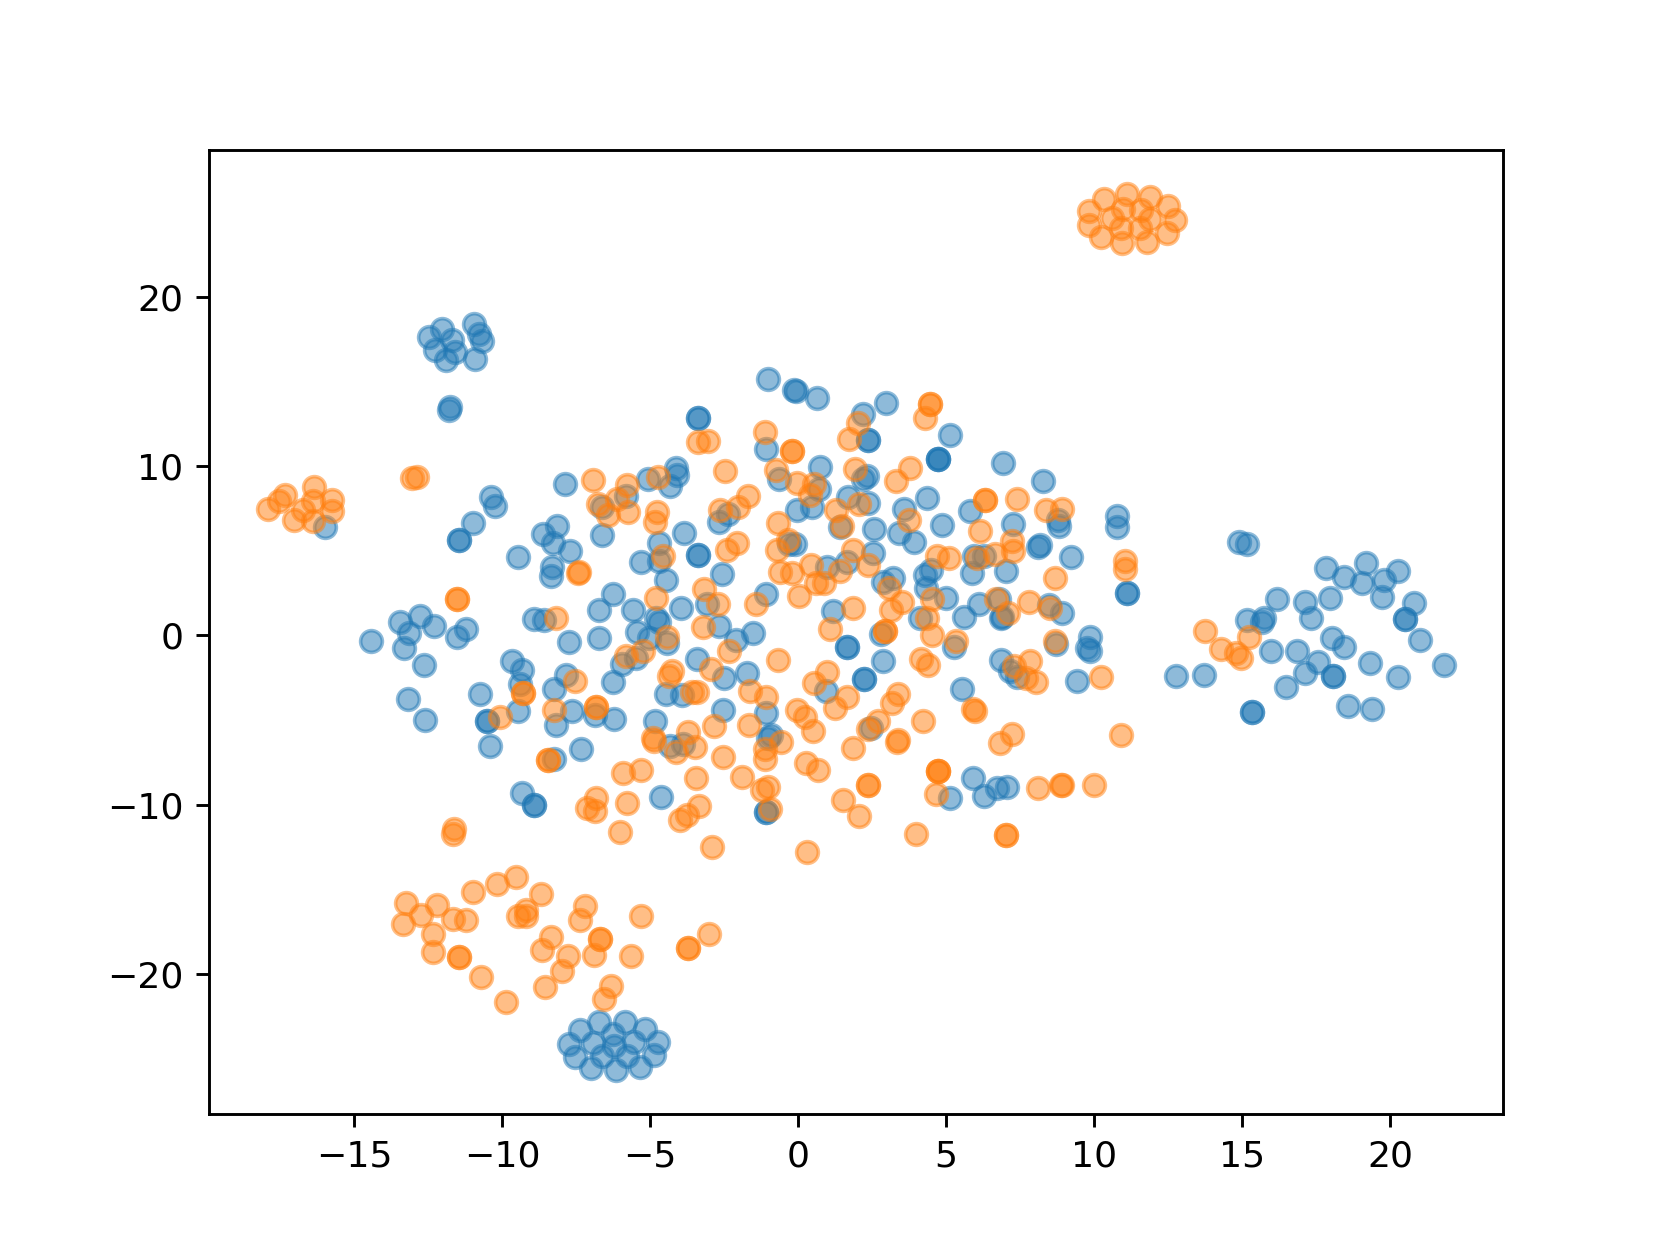

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

In [86]:
embedding_clusters = []
embedding_clusters.extend (convert_to_vectors(gt1))
embedding_clusters.extend (convert_to_vectors(gt2))
embedding_clusters.extend (convert_to_vectors(gt3))
embedding_clusters.extend (convert_to_vectors(gt4))
embedding_clusters.extend (convert_to_vectors(gt5))

In [87]:
embedding_clusters_2d = convert_to_2d(embedding_clusters)
ax1.scatter(embedding_clusters_2d[:,0], embedding_clusters_2d[:,1], alpha=0.5)

(255, 1, 4800)
(255, 4800)
(255, 2)


In [88]:
embedding_clusters_predicted = convert_to_vectors(pd1)
embedding_clusters_2d_predicted = convert_to_2d(embedding_clusters)
ax1.scatter(embedding_clusters_2d_predicted[:,0], embedding_clusters_2d_predicted[:,1], alpha=0.5)

(255, 1, 4800)
(255, 4800)
(255, 2)


In [89]:
plt.show()
plt.savefig("results.png")